### Get going by asking the following questions and looking for the answers with some code and plots:
    Can you count something interesting?
    Can you find some trends (high, low, increase, decrease, anomalies)?
    Can you make a bar plot or a histogram?
    Can you compare two related quantities?
    Can you make a scatterplot?
    Can you make a time-series plot?

### Having made these plots:
    What are some insights you get from them? 
    Do you see any correlations? 
    Is there a hypothesis you would like to investigate further? 
    What other questions do they lead you to ask?

### By now you’ve asked a bunch of questions, and found some neat insights. 
    Is there an interesting narrative, a way of presenting the insights using text and plots from the above, 
        that tells a compelling story? 
    As you work out this story, what are some other trends/relationships you think will make it more complete?



In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob


## Load Station Data Sets

In [2]:
# load station data set into a pandas frame
try:

    file_path_slug = '../../datasets/bayareabikeshare/*_station_data.csv'

    # glob all files
    file_list = glob(file_path_slug)

    stations = pd.DataFrame()

    for file in file_list:
        print('Reading file \t ' + str(file))

        # import file in chunks to temp DataFrame
        station_reader = pd.read_csv(file, chunksize=1000, iterator=True)

        # concat chunks into DataFrame
        tmp_df = pd.concat(station_reader)

        # concat tmp dataframe to status_df
        stations = pd.concat([stations, tmp_df], ignore_index=True)

    print('data loaded successfully!')
except:
    print('oops... something went wrong loading the data :(')


Reading file 	 ../../datasets/bayareabikeshare/201402_station_data.csv
Reading file 	 ../../datasets/bayareabikeshare/201408_station_data.csv
Reading file 	 ../../datasets/bayareabikeshare/201508_station_data.csv
Reading file 	 ../../datasets/bayareabikeshare/201608_station_data.csv
data loaded successfully!


## Clean and Prep Station Data Sets

In [3]:
# clean data frame and do some data prep 

#   drop empty rows
stations.dropna(how="all", inplace=True)

# create a lat_long column
stations['lat_long'] = stations['lat'].astype(str) + ',' + stations['long'].astype(str)

#   convert station IDs to strings
stations['station_id'] = stations['station_id'].astype(int)
stations['station_id'] = stations['station_id'].astype(str)

#   convert dockcount to int, no such thing as a partial dock
stations['dockcount'] = stations['dockcount'].astype(int)

#   convert installation to datetime
stations['installation'] = pd.to_datetime(stations['installation'])

#   drop duplicate rows and reindex
stations = stations.drop_duplicates(keep='first')
stations.reset_index(inplace=True, drop=True)

## Load Weather Data Sets

In [4]:
# load weather data into pandas dataframe

try:
    weather_path_01 = '../../datasets/bayareabikeshare/201402_weather_data.csv'
    weather_01 = pd.read_csv(weather_path_01, header=0)

    weather_path_02 = '../../datasets/bayareabikeshare/201408_weather_data.csv'
    weather_02 = pd.read_csv(weather_path_02, header=0)

    weather_path_03 = '../../datasets/bayareabikeshare/201508_weather_data.csv'
    weather_03 = pd.read_csv(weather_path_03, header=0)

    weather_path_04 = '../../datasets/bayareabikeshare/201608_weather_data.csv'
    weather_04 = pd.read_csv(weather_path_04, header=0)

    print('data loaded successfully!')
except:
    print('oops... something went wrong loading the data :(')

data loaded successfully!


## Clean and Prep Weather Data

In [5]:
# clean data frame and do some data prep 

# columns of weather_01 are named differently than the rest, set them to match
weather_01.columns = weather_02.columns

#   merge all dataframes into a giant weather frame
weather_frames = [weather_01, weather_02, weather_03, weather_04]
weather = pd.concat(weather_frames)

#   Trim down weather data to columns we care about
columns_wanted =    ['PDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF', ' Mean Wind SpeedMPH',  'PrecipitationIn', ' CloudCover', 'Zip']
column_new_names =  ['date', 'max_temp', 'mean_temp', 'min_temp', 'mean_wind', 'precipitation', 'cloud_cover', 'zip']

#   slim down dataframe to just things we need
weather = weather.loc[:,columns_wanted]
weather.columns = column_new_names

#   convert date column to datetime objects
weather['date'] = pd.to_datetime(weather['date'])

#   use date column as index
weather = weather.set_index('date')

#   precipitation column has a special 'T' value for trace amounts of rain, set all of these to zero
weather.loc[weather['precipitation'] == 'T', 'precipitation'] = 0.

#   force all columns to be numerical values
weather['precipitation'] = pd.to_numeric(weather['precipitation'], errors='coerce')

#   change zip to int
# weather['zip'] = weather['zip'].astype(int)

### Visualize some Weather Data

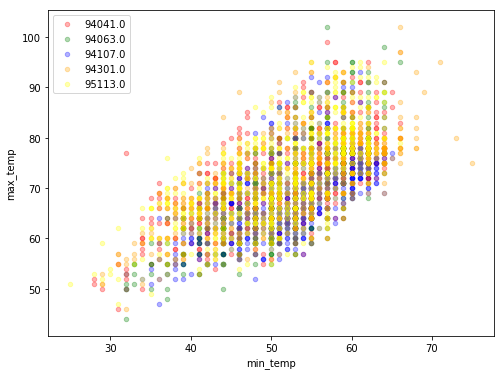

In [6]:
# #   plot mean_temp by zip
color_list = ['red', 'green', 'blue', 'orange', 'yellow']
counter = 0
fig, ax = plt.subplots(figsize=(8,6))
for label, df in weather.groupby('zip'):
    df.plot(kind='scatter', c=color_list[counter], x='min_temp', y='max_temp', ax=ax, label=label, alpha=0.3)
    counter += 1
plt.legend()
plt.xlabel='min_temp (F)'
plt.ylabel='max_temp (F)'
plt.show()

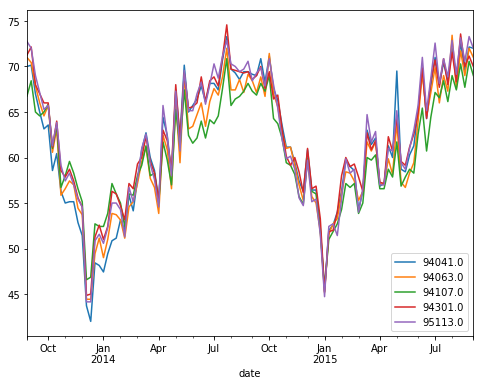

In [7]:
# #   plot mean_temp by zip
fig, ax = plt.subplots(figsize=(8,6))
for label, df in weather.groupby('zip'):

    mean_temp = df['mean_temp']
    mean_temp = mean_temp.resample('W').mean()
    mean_temp.plot(kind="line", ax=ax, label=label)

plt.legend()
plt.show()

## Load Status Data Sets

In [ ]:
try:

    file_path_slug = '../../datasets/bayareabikeshare/*_status_data.csv'

    # glob all files
    file_list = glob(file_path_slug)

    status = pd.DataFrame()

    counter = 1
    chunks = []
    for file in file_list:
        print('\nReading file [' + str(counter) + ' of ' + str(len(file_list)) + ']\t ' + str(file))

        for chunk in pd.read_csv(file, chunksize=5000, iterator=True, parse_dates=['time'], index_col=False):
            
            # set time to index of chunk
            chunk = chunk.set_index('time')

            chunks.append(chunk)

        counter += 1

    # status = pd.concat(chunks, ignore_index=True)
    status = pd.concat(chunks)

    print('data loaded successfully!')
except:
    print('oops... something went wrong loading the data :(')



Reading file [1 of 4]	 ../../datasets/bayareabikeshare/201402_status_data.csv

Reading file [2 of 4]	 ../../datasets/bayareabikeshare/201408_status_data.csv

Reading file [3 of 4]	 ../../datasets/bayareabikeshare/201508_status_data.csv

Reading file [4 of 4]	 ../../datasets/bayareabikeshare/201608_status_data.csv


### Visualize some Status Data

In [ ]:
status_docks_available = status['docks_available']['2014']

# Resample to hourly data, aggregating by mean
status_docks_available_daily_mean = status_docks_available.resample('D').mean()

# Use a rolling 4 hour window with method chaining to smooth
status_docks_available_daily_mean_smoothed = status_docks_available_daily_mean.rolling(window=4).mean()



In [ ]:
print(status_docks_available_daily_mean_smoothed.head())

In [ ]:
status_docks_available_daily_mean_smoothed.plot()
plt.title('Docks Available by Day, rolling Mean')
plt.xlabel('Date')
plt.ylabel('Docks Available')
plt.show()

In [13]:
# series.groupby(series.index.hour).mean()
print(status.head())


                     station_id  bikes_available  docks_available
time                                                             
2013-08-29 12:06:01           2                2               25
2013-08-29 12:07:01           2                2               25
2013-08-29 12:08:01           2                2               25
2013-08-29 12:09:01           2                2               25
2013-08-29 12:10:01           2                2               25


In [71]:
hourly_g0 = status.groupby(status.station_id).mean()
print(hourly_g0.head())

            bikes_available  docks_available
station_id                                  
2                 13.159291        13.817199
3                  7.971078         7.024404
4                  5.315655         5.641583
5                  9.268701         9.731283
6                  7.679861         7.315260


In [72]:
hourly_g1 = status.groupby([status.index.hour, status.station_id]).mean()
print(hourly_g1.head())

                 bikes_available  docks_available
time station_id                                  
0    2                 13.708529        13.264269
     3                  7.944952         7.049516
     4                  5.513509         5.442231
     5                  9.029230         9.970770
     6                  7.345505         7.648963


In [73]:
hourly_g2 = status.groupby([status.station_id, status.index.hour]).mean()
print(hourly_g2.head())

                 bikes_available  docks_available
station_id time                                  
2          0           13.708529        13.264269
           1           13.627127        13.346379
           2           13.555248        13.417565
           3           13.545186        13.427859
           4           13.562067        13.411221


In [47]:
print(hourly.head())

                 bikes_available  docks_available
time station_id                                  
0    2                 13.708529        13.264269
     3                  7.944952         7.049516
     4                  5.513509         5.442231
     5                  9.029230         9.970770
     6                  7.345505         7.648963


In [48]:
print(hourly.tail())

                 bikes_available  docks_available
time station_id                                  
23   76                 8.853607        10.124393
     77                 9.832524        13.992483
     80                 7.375000         7.625000
     82                 6.409649         8.590351
     83                 7.444444         7.555556


In [49]:
print(type(hourly))

<class 'pandas.core.frame.DataFrame'>


In [64]:
hourly = status.groupby([status.index.hour, status.station_id]).mean()

hourly_docks_available = hourly['docks_available']

# Resample to hourly data, aggregating by mean
mean_hourly_docks_available = hourly.resample('H').mean()

# Use a rolling 4 hour window with method chaining to smooth
# status_docks_available_hourly_mean_smoothed = status_docks_available_hourly_mean.rolling(window=4).mean()



TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'MultiIndex'

In [58]:
print(hourly.head())
# print(hourly_docks_available.head())

           bikes_available                                              \
time                    0          1          2          3          4    
station_id                                                               
2                13.708529  13.627127  13.555248  13.545186  13.562067   
3                 7.944952   7.970531   7.953276   7.956245   7.951659   
4                 5.513509   5.532769   5.533591   5.505769   5.501802   
5                 9.029230   9.033838   9.020551   9.018370   9.014419   
6                 7.345505   7.325462   7.302276   7.326041   7.328219   

                                                                     ...      \
time               5          6          7          8          9     ...       
station_id                                                           ...       
2           13.776175  14.290382  14.187725  12.717737  11.591620    ...       
3            7.949408   7.930575   7.924115   7.970654   7.943021    ...       
4      

TypeError: 'str' object is not callable

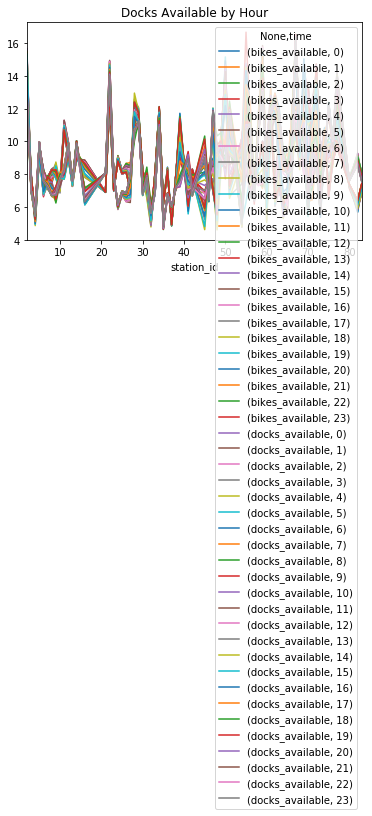

In [59]:

hourly.plot()
plt.title('Docks Available by Hour')
plt.xlabel('Dock')
plt.ylabel('Docks Available')
plt.show()

KeyboardInterrupt: 

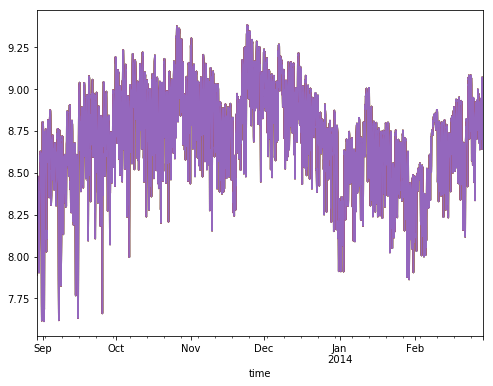

In [38]:
# #   plot mean_temp by zip
fig, ax = plt.subplots(figsize=(8,6))
for label, df in status.groupby(['station_id', status.index.hour]):
    bikes_available_mean = status['bikes_available']
    bikes_available_mean = bikes_available_mean.resample('H').mean()   
    bikes_available_mean.plot(kind='line', ax=ax, label=label)
       
plt.legend()
plt.show()

In [ ]:
test = status.groupby(['station_id', status.index.hour])

In [ ]:
print(test.resample('H').mean())